# Loading libraries

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

## Data splitting

### Loading a dataset for classification

In [335]:
churnData=pd.read_csv("Data/DATA_Customer-Churn.csv")

In [336]:
#Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [337]:
churnData["TotalCharges"]=pd.to_numeric(churnData["TotalCharges"],errors='coerce')

In [338]:
# droping nan values

churnData.dropna(inplace=True)

In [339]:
#convert churn into 0 and 1 

def x_y_to_1_0(value:[str]=None, x="Yes", y="No"):
    if value == x:
        return 1
    elif value == y:
        return 0
    else:
        return None
    
churnData["Churn"] = list(map(x_y_to_1_0, churnData["Churn"]))

In [340]:
#Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges

#churnData = churnData[["tenure","SeniorCitizen","MonthlyCharges","TotalCharges","Churn"]]

In [341]:
#X/Y Split

X=churnData.drop("Churn", axis=1)
y=churnData["Churn"]

In [342]:
#get dummies
cat_feat=X.select_dtypes("object")
cat_cols=pd.get_dummies(cat_feat, drop_first=True)

#concatinate
X=X._get_numeric_data()
X=pd.concat([X,cat_cols],axis=1)

## Logistic regression

,Error_metric,Train,Test
0,Accuracy,0.809600,0.776830
1,Precision,0.676991,0.650000
2,Recall,0.520054,0.457286


Confusion matrix for the train set
[[3789  365]
 [ 706  765]]


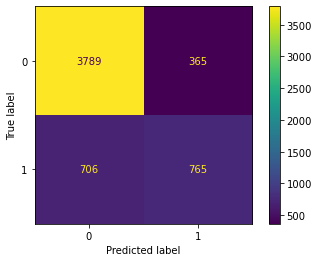



Confusion matrix for the test set
[[911  98]
 [216 182]]


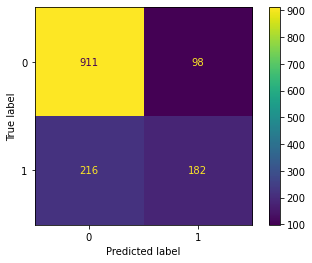

In [343]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label=1),
                                         recall_score(y_train, y_pred_train_log,pos_label=1)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label=1),
                                        recall_score(y_test, y_pred_test_log,pos_label=1)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## KNN

,Error_metric,Train,Test
0,Accuracy,0.837867,0.748401
1,Precision,0.730041,0.569182
2,Recall,0.602991,0.454774


Confusion matrix for the train set
[[3826  328]
 [ 584  887]]


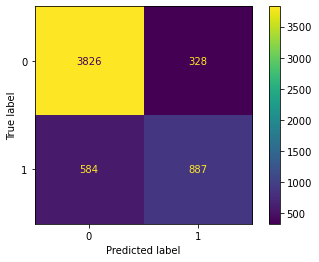



Confusion matrix for the test set
[[872 137]
 [217 181]]


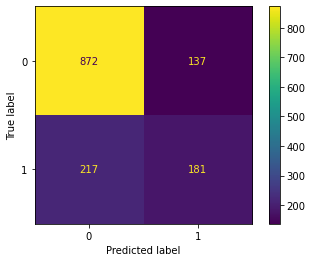

In [344]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5) 

knn_model.fit(X_train_mod, y_train)

y_pred_train_knn = knn_model.predict(X_train_mod)
y_pred_test_knn = knn_model.predict(X_test_mod)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label=1),
                                         recall_score(y_train, y_pred_train_knn,pos_label=1)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn,pos_label=1),
                                        recall_score(y_test, y_pred_test_knn,pos_label=1)]})

display(performance_knn)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(knn_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(knn_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Decision Tree

In [345]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

#Fit a Decision Tree Classifier on the training data.
#Check the accuracy on the test data.

,Error_metric,Train,Test
0,Accuracy,0.789511,0.759773
1,Precision,0.653805,0.625000
2,Recall,0.414684,0.376884


Confusion matrix for the train set
[[3831  861]
 [ 323  610]]


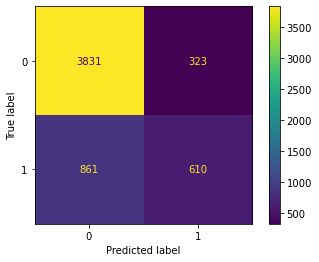



Confusion matrix for the test set
[[919 248]
 [ 90 150]]


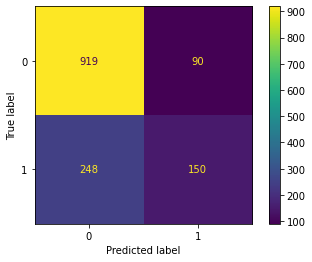

In [346]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label=1),
                                         recall_score(y_train, y_pred_train_dt,pos_label=1)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label=1),
                                        recall_score(y_test, y_pred_test_dt,pos_label=1)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

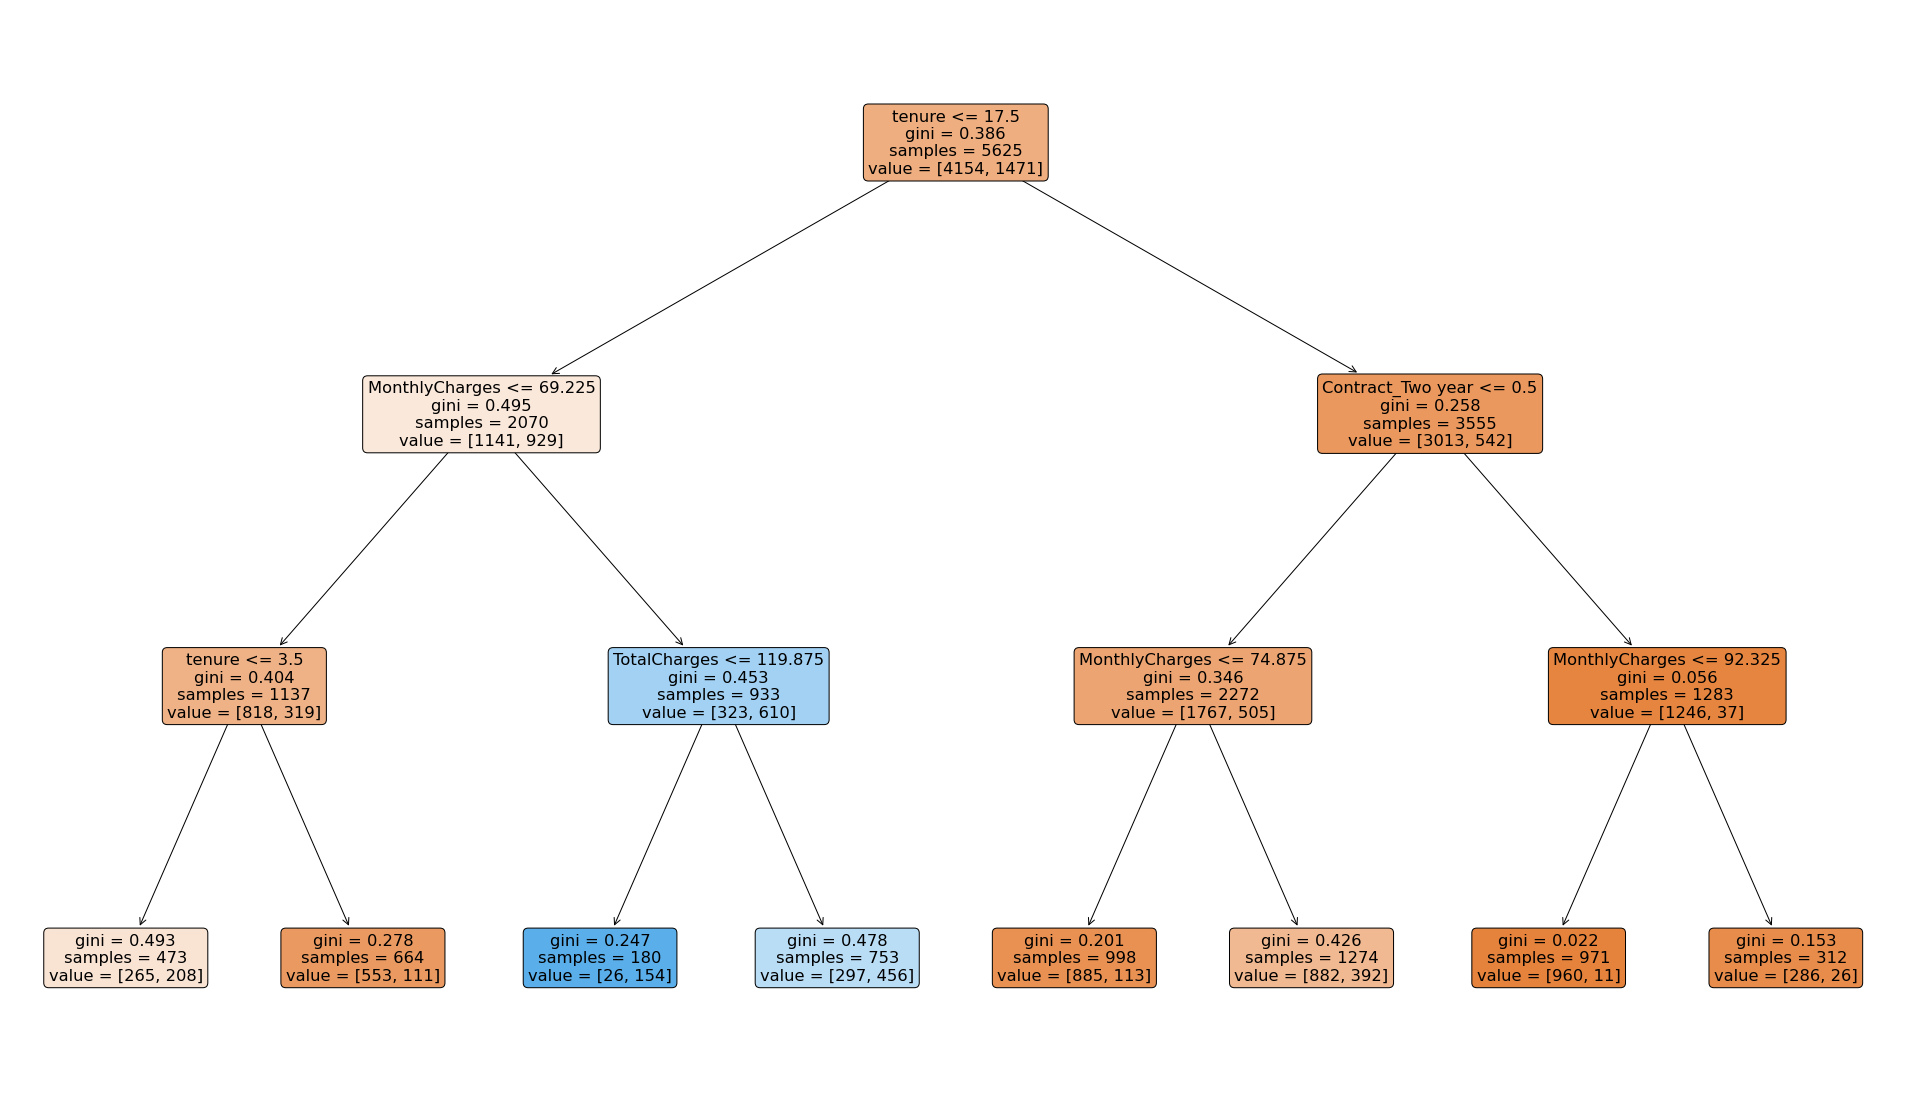

In [347]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

##  Models Comparision

In [348]:
model1 = LogisticRegression()

model2 = KNeighborsClassifier()

model3 = DecisionTreeClassifier()


model_pipeline = [model1, model2, model3]
model_names = ["Logistic Regression","KNN Classifier","DecisionTreeClassifier"]
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=4))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Logistic Regression': 0.8019543362237785, 'KNN Classifier': 0.7708431273827975, 'DecisionTreeClassifier': 0.736712444685736}


## Upsampling using SMOTE

In [349]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [350]:
churnData['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [351]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

### Testing on Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.809600,0.776830
1,Precision,0.676991,0.650000
2,Recall,0.520054,0.457286


,Error_metric,Train,Test
0,Accuracy,0.820097,0.809293
1,Precision,0.808681,0.808333
2,Recall,0.835486,0.823585


Confusion matrix for the train set
[[3346  811]
 [ 675 3428]]


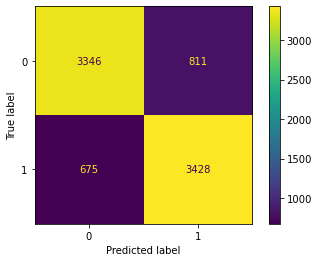



Confusion matrix for the test set
[[799 207]
 [187 873]]


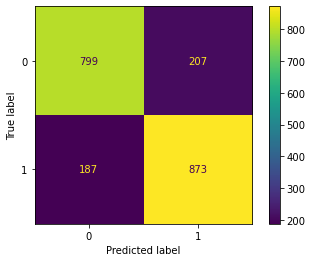

In [352]:
## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=11)

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log_sm = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label=1),
                                         recall_score(y_train, y_pred_train_log,pos_label=1)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label=1),
                                        recall_score(y_test, y_pred_test_log,pos_label=1)]})

display(performance_log)
display(performance_log_sm)


print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

#### Cross Validation

In [353]:
scores=cross_val_score(log_model, X_train_mod, y_train, cv=5)
scores

array([0.82748184, 0.7972155 , 0.82263923, 0.82627119, 0.82445521])

In [354]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.82 accuracy with a standard deviation of 0.01


### Testing on KNN

,Error_metric,Train,Test
0,Accuracy,0.837867,0.748401
1,Precision,0.730041,0.569182
2,Recall,0.602991,0.454774


,Error_metric,Train,Test
0,Accuracy,0.860412,0.801065
1,Precision,0.848700,0.793135
2,Recall,0.874970,0.828302


Confusion matrix for the train set
[[3517  640]
 [ 513 3590]]


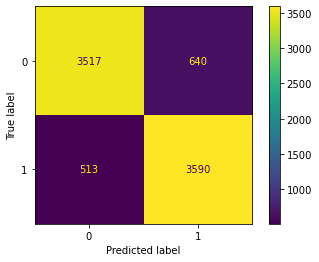



Confusion matrix for the test set
[[777 229]
 [182 878]]


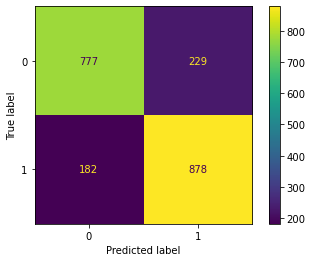

In [355]:
knn_model.fit(X_train_mod, y_train)

y_pred_train_knn = knn_model.predict(X_train_mod)
y_pred_test_knn = knn_model.predict(X_test_mod)

performance_knn_sm = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label=1),
                                         recall_score(y_train, y_pred_train_knn,pos_label=1)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn,pos_label=1),
                                        recall_score(y_test, y_pred_test_knn,pos_label=1)]})

display(performance_knn)
display(performance_knn_sm)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(knn_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(knn_model,X_test_mod,y_test, values_format = 'd')
plt.show()

#### Cross Validation

In [356]:
scores=cross_val_score(knn_model, X_train_mod, y_train, cv=5)
scores

array([0.80447942, 0.781477  , 0.80266344, 0.81779661, 0.7972155 ])

In [357]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.80 accuracy with a standard deviation of 0.01


### Testing on Decison Tree

,Error_metric,Train,Test
0,Accuracy,0.789511,0.759773
1,Precision,0.653805,0.625000
2,Recall,0.414684,0.376884


,Error_metric,Train,Test
0,Accuracy,0.753753,0.759923
1,Precision,0.683130,0.697479
2,Recall,0.940531,0.939623


Confusion matrix for the train set
[[2367  244]
 [1790 3859]]


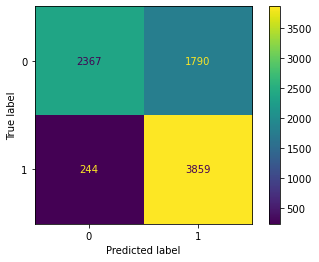



Confusion matrix for the test set
[[574  64]
 [432 996]]


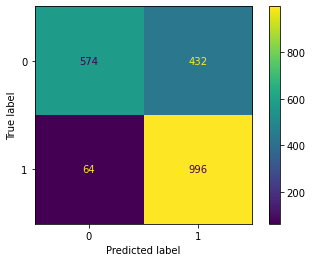

In [358]:
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df_sm = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label=1),
                                         recall_score(y_train, y_pred_train_dt,pos_label=1)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label=1),
                                        recall_score(y_test, y_pred_test_dt,pos_label=1)]})

display(performance_df)
display(performance_df_sm)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

#### Cross Validation

In [359]:
scores=cross_val_score(dt, X_train, y_train, cv=5)
scores

array([0.76392252, 0.74031477, 0.75847458, 0.77118644, 0.75      ])

In [360]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.76 accuracy with a standard deviation of 0.01


## Downsampling

category_0 = churnData[churnData['Churn'] == 0]
category_1 = churnData[churnData['Churn'] == 1]

category_0.shape

category_0_down = category_0.sample(len(category_1,))
#print(category_0.shape)
#print(category_1.shape)

data = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['TARGET_B'].value_counts()

## Random Forest

In [371]:
from sklearn.ensemble import RandomForestClassifier

In [372]:
clf = RandomForestClassifier(max_depth=3, random_state=11)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7941888619854721
0.7933204259438529


In [373]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=10, random_state=11)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
cross_val_scores

array([0.82445521, 0.80690073, 0.8401937 , 0.83232446, 0.83292978])

In [370]:
np.mean(cross_val_scores)

0.8266343825665861

### Grid Search

In [381]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'max_depth': [3, 6],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
#    'max_samples' : ['None', 0.5]
    }
clf = RandomForestClassifier(random_state=100)

In [382]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [383]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [384]:
grid_search.best_params_ #To check the best set of parameters returned

{'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [385]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.149122,0.007750,0.010919,0.003048,3,sqrt,1,2,50,"{'max_depth': 3, 'max_features': 'sqrt', 'min_...",...,0.790678,0.011671,13,0.792676,0.793130,0.787682,0.786471,0.789649,0.789921,0.002641
1,0.292555,0.013796,0.017863,0.002351,3,sqrt,1,2,100,"{'max_depth': 3, 'max_features': 'sqrt', 'min_...",...,0.790315,0.011610,17,0.793735,0.794643,0.790708,0.788741,0.790860,0.791737,0.002156
2,1.428084,0.021589,0.083593,0.006578,3,sqrt,1,2,500,"{'max_depth': 3, 'max_features': 'sqrt', 'min_...",...,0.789104,0.009750,21,0.795400,0.796005,0.787530,0.789346,0.790103,0.791677,0.003397
3,0.147907,0.012810,0.013530,0.004246,3,sqrt,1,4,50,"{'max_depth': 3, 'max_features': 'sqrt', 'min_...",...,0.790678,0.011671,13,0.792676,0.793130,0.787682,0.786471,0.789649,0.789921,0.002641
4,0.272908,0.008307,0.017749,0.003437,3,sqrt,1,4,100,"{'max_depth': 3, 'max_features': 'sqrt', 'min_...",...,0.790315,0.011610,17,0.793735,0.794643,0.790708,0.788741,0.790860,0.791737,0.002156
5,1.415355,0.032528,0.082982,0.005038,3,sqrt,1,4,500,"{'max_depth': 3, 'max_features': 'sqrt', 'min_...",...,0.789104,0.009750,21,0.795400,0.796005,0.787530,0.789346,0.790103,0.791677,0.003397
6,0.143533,0.012798,0.008460,0.001942,3,sqrt,2,2,50,"{'max_depth': 3, 'max_features': 'sqrt', 'min_...",...,0.790678,0.011671,13,0.792676,0.793130,0.787682,0.786471,0.789649,0.789921,0.002641
7,0.278399,0.010740,0.020251,0.005668,3,sqrt,2,2,100,"{'max_depth': 3, 'max_features': 'sqrt', 'min_...",...,0.790315,0.011610,17,0.793735,0.794643,0.790708,0.788741,0.790860,0.791737,0.002156
8,1.430714,0.027019,0.079764,0.004759,3,sqrt,2,2,500,"{'max_depth': 3, 'max_features': 'sqrt', 'min_...",...,0.789104,0.009750,21,0.795400,0.796005,0.787530,0.789346,0.790103,0.791677,0.003397
9,0.147336,0.001272,0.010853,0.003879,3,sqrt,2,4,50,"{'max_depth': 3, 'max_features': 'sqrt', 'min_...",...,0.790678,0.011671,13,0.792676,0.793130,0.787682,0.786471,0.789649,0.789921,0.002641


### using the above results 

In [386]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.835230024213075


### Feature Importance

In [387]:
clf.fit( X_train, y_train)

RandomForestClassifier(max_features='sqrt', random_state=0)

In [388]:
len(X_train.columns)

22

In [389]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [390]:
df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
2,MonthlyCharges,0.179034
3,TotalCharges,0.174261
1,tenure,0.147083
9,OnlineSecurity_Yes,0.065427
21,Contract_Two year,0.062820
15,TechSupport_Yes,0.050769
20,Contract_One year,0.045944
5,Partner_Yes,0.033823
11,OnlineBackup_Yes,0.031160
6,Dependents_Yes,0.026130
